In [3]:
# --- Resumen del bloque: importa librerías y configura entorno | usa librerías estadísticas/ML | visualizaciones y diagnóstico. ---
# Importaciones / configuración
import pandas as pd
# Importaciones / configuración
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Importaciones / configuración
import matplotlib.pyplot as plt
# Importaciones / configuración
import numpy as np

In [4]:
# --- Resumen del bloque: entrada/salida de datos con pandas. ---
# Entrada/salida de datos con pandas
df = pd.read_csv('dfEncoding.csv')

In [5]:
# --- Resumen del bloque: pasos del análisis estadístico. ---
df.rename(columns={'Price (excl. tax)': 'Price'}, inplace=True)
df.drop(columns=['Description'], inplace=True)

#1. Análisis Estadístico: Prueba de Hipótesis

## Hipótesis 1: ¿Los libros con alta calificación (Rating >= 4) son más caros que los de baja calificación (Rating < 4)?

> Add blockquote



In [6]:
# --- Resumen del bloque: limpieza y preparación de datos | pruebas de hipótesis. ---
print("\n--- Hipótesis 1: Precio por Calificación del Libro ---")
# Tratamiento de valores faltantes
precios_alta_calif = df[df['Rating'] >= 4]['Price'].dropna()
# Tratamiento de valores faltantes
precios_baja_calif = df[df['Rating'] < 4]['Price'].dropna()

# Prueba t (comparación de medias)
t_stat, p_value = stats.ttest_ind(precios_alta_calif, precios_baja_calif, alternative='greater', equal_var=False)

print(f"H₀: μ_precio_alta_calif <= μ_precio_baja_calif")
print(f"H₁: μ_precio_alta_calif > μ_precio_baja_calif")
print(f"Estadístico t: {t_stat:.4f}, Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Resultado: Se rechaza H₀. Los libros con mayor calificación tienden a ser más caros.")
else:
    print("Resultado: No se rechaza H₀. No hay evidencia de que los libros con mayor calificación sean más caros.")



--- Hipótesis 1: Precio por Calificación del Libro ---
H₀: μ_precio_alta_calif <= μ_precio_baja_calif
H₁: μ_precio_alta_calif > μ_precio_baja_calif
Estadístico t: 1.0793, Valor p: 0.1404
Resultado: No se rechaza H₀. No hay evidencia de que los libros con mayor calificación sean más caros.


## Hipótesis 2: ¿Existe una diferencia de precio entre los libros de Ficción (Fiction) y los de No Ficción (Nonfiction)?

In [7]:
# --- Resumen del bloque: limpieza y preparación de datos | pruebas de hipótesis. ---
# Tratamiento de valores faltantes
precios_ficcion = df[df['Category_Fiction'] == True]['Price'].dropna()
# Tratamiento de valores faltantes
precios_noficcion = df[df['Category_Nonfiction'] == True]['Price'].dropna()

# Prueba t (comparación de medias)
t_stat, p_value = stats.ttest_ind(precios_ficcion, precios_noficcion, equal_var=False) # Prueba de dos colas

print(f"H₀: μ_precio_ficcion = μ_precio_noficcion")
print(f"H₁: μ_precio_ficcion ≠ μ_precio_noficcion")
print(f"Estadístico t: {t_stat:.4f}, Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Resultado: Se rechaza H₀. Existe una diferencia de precio significativa entre libros de ficción y no ficción.")
else:
    print("Resultado: No se rechaza H₀. No hay una diferencia de precio significativa.")

H₀: μ_precio_ficcion = μ_precio_noficcion
H₁: μ_precio_ficcion ≠ μ_precio_noficcion
Estadístico t: 0.7883, Valor p: 0.4320
Resultado: No se rechaza H₀. No hay una diferencia de precio significativa.


## Hipótesis 3: ¿La calificación promedio de los libros de Ciencia Ficción (Science Fiction) es diferente a la de los de Misterio (Mystery)?

In [8]:
# --- Resumen del bloque: limpieza y preparación de datos | pruebas de hipótesis. ---
# Tratamiento de valores faltantes
rating_scifi = df[df['Category_Science Fiction'] == True]['Rating'].dropna()
# Tratamiento de valores faltantes
rating_mystery = df[df['Category_Mystery'] == True]['Rating'].dropna()

# Prueba t (comparación de medias)
t_stat, p_value = stats.ttest_ind(rating_scifi, rating_mystery, equal_var=False)

print(f"H₀: μ_rating_scifi = μ_rating_mystery")
print(f"H₁: μ_rating_scifi ≠ μ_rating_mystery")
print(f"Estadístico t: {t_stat:.4f}, Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Resultado: Se rechaza H₀. Existe una diferencia en la calificación promedio entre estas dos categorías.")
else:
    print("Resultado: No se rechaza H₀. No hay diferencia significativa en la calificación.")

H₀: μ_rating_scifi = μ_rating_mystery
H₁: μ_rating_scifi ≠ μ_rating_mystery
Estadístico t: -1.5792, Valor p: 0.1251
Resultado: No se rechaza H₀. No hay diferencia significativa en la calificación.


## Hipótesis 4:  ¿Los libros de la categoría Clásicos (Classics) tienen un precio menor al promedio general?

In [9]:
# --- Resumen del bloque: limpieza y preparación de datos | pruebas de hipótesis. ---
# Tratamiento de valores faltantes
precios_clasicos = df[df['Category_Classics'] == True]['Price'].dropna()
precio_promedio_total = df['Price'].mean()

# t-test de 1 muestra, de una cola (menor que)
# Prueba t (comparación de medias)
t_stat, p_value = stats.ttest_1samp(precios_clasicos, precio_promedio_total, alternative='less')

print(f"H₀: μ_precio_clasicos >= μ_promedio_total")
print(f"H₁: μ_precio_clasicos < μ_promedio_total")
print(f"Estadístico t: {t_stat:.4f}, Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Resultado: Se rechaza H₀. Los libros clásicos tienden a ser significativamente más baratos que el promedio.")
else:
    print("Resultado: No se rechaza H₀. El precio de los libros clásicos no es significativamente menor al promedio.")


H₀: μ_precio_clasicos >= μ_promedio_total
H₁: μ_precio_clasicos < μ_promedio_total
Estadístico t: 0.4749, Valor p: 0.6797
Resultado: No se rechaza H₀. El precio de los libros clásicos no es significativamente menor al promedio.


## Hipótesis 5: ¿Hay diferencia en la disponibilidad entre los libros de Romance y los de Thriller?

In [10]:
# --- Resumen del bloque: limpieza y preparación de datos | pruebas de hipótesis. ---
# Tratamiento de valores faltantes
stock_romance = df[df['Category_Romance'] == True]['Availability'].dropna()
# Tratamiento de valores faltantes
stock_thriller = df[df['Category_Thriller'] == True]['Availability'].dropna()

# Prueba t (comparación de medias)
t_stat, p_value = stats.ttest_ind(stock_romance, stock_thriller, equal_var=False)

print(f"H₀: μ_stock_romance = μ_stock_thriller")
print(f"H₁: μ_stock_romance ≠ μ_stock_thriller")
print(f"Estadístico t: {t_stat:.4f}, Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Resultado: Se rechaza H₀. Hay una diferencia significativa en el stock de estas dos categorías.")
else:
    print("Resultado: No se rechaza H₀. No hay una diferencia de stock significativa entre ambas.")

H₀: μ_stock_romance = μ_stock_thriller
H₁: μ_stock_romance ≠ μ_stock_thriller
Estadístico t: -1.4118, Valor p: 0.1763
Resultado: No se rechaza H₀. No hay una diferencia de stock significativa entre ambas.


# 2. Análisis de Componentes Principales (PCA)

In [11]:
# --- Resumen del bloque: limpieza y preparación de datos | iteraciones. ---
# Seleccionar solo columnas numéricas y booleanas
df_pca = df.select_dtypes(include=[np.number, bool])

# Convertir columnas booleanas a 0 y 1
# Bucle for
for col in df_pca.select_dtypes(include=bool).columns:
# Conversión de tipos
    df_pca[col] = df_pca[col].astype(int)

# Rellenar valores nulos por si acaso (aunque no debería haber)
# Tratamiento de valores faltantes
df_pca = df_pca.fillna(df_pca.mean())

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

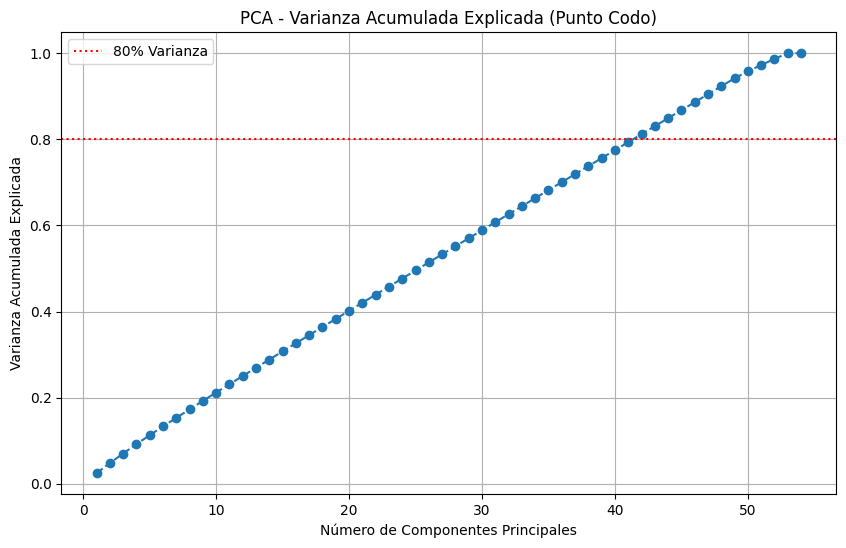

In [12]:
# --- Resumen del bloque: visualizaciones y diagnóstico. ---
# Aplicar PCA
pca = PCA()
# Ajuste/entrenamiento del modelo
pca.fit(X_scaled)

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de Varianza Acumulada (Punto Codo)
# Gráfica con Matplotlib
plt.figure(figsize=(10, 6))
# Gráfica con Matplotlib
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
# Gráfica con Matplotlib
plt.title('PCA - Varianza Acumulada Explicada (Punto Codo)')
# Gráfica con Matplotlib
plt.xlabel('Número de Componentes Principales')
# Gráfica con Matplotlib
plt.ylabel('Varianza Acumulada Explicada')
# Gráfica con Matplotlib
plt.grid(True)
# Gráfica con Matplotlib
plt.axhline(y=0.80, color='r', linestyle=':', label='80% Varianza')
# Gráfica con Matplotlib
plt.legend()
# Gráfica con Matplotlib
plt.show()

In [13]:
# --- Resumen del bloque: pasos del análisis estadístico. ---
# Determinar el número de componentes para retener ~80% de la varianza
n_components_80 = np.where(cumulative_variance >= 0.80)[0][0] + 1
print(f"\nSe necesitan {n_components_80} componentes para explicar al menos el 80% de la varianza.")


Se necesitan 42 componentes para explicar al menos el 80% de la varianza.


In [14]:
# --- Resumen del bloque: pasos del análisis estadístico. ---
# Aplicar PCA con el número de componentes seleccionado
pca_final = PCA(n_components=n_components_80)
X_pca = pca_final.fit_transform(X_scaled)

print(f"\nForma del DataFrame original (solo numérico): {X_scaled.shape}")
print(f"Forma del DataFrame reducido con PCA: {X_pca.shape}")


Forma del DataFrame original (solo numérico): (1000, 54)
Forma del DataFrame reducido con PCA: (1000, 42)
